# Exploratory Data Analysis of Kaggle Breast Cancer Proteomes as a Biologist

### Downloading the Dataset

In [3]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
#### import dataset
dataset_url = 'https://www.kaggle.com/piotrgrabo/breastcancerproteomes' 

In [5]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anubratadas
Your Kaggle Key: ········


100%|██████████| 5.27M/5.27M [00:00<00:00, 58.4MB/s]

The dataset has been downloaded and extracted.

In [6]:
data_dir = './breastcancerproteomes'

In [7]:
import os
os.listdir(data_dir)

['77_cancer_proteomes_CPTAC_itraq.csv',
 'clinical_data_breast_cancer.csv',
 'PAM50_proteins.csv']

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "breast_cancer_proteomes"

In [9]:
import jovian

## Data Preparation and Cleaning

#### This is a Cancer Proteome Dataset from Kaggle

#### Load Libraries

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import seaborn as sns

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'Tahoma'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

#### EDA

In [172]:
proteome=pd.read_csv('./breastcancerproteomes/77_cancer_proteomes_CPTAC_itraq.csv',header=0)

In [173]:
proteome.head(n=3)

RefSeq_accession_number gene_symbol           gene_name  AO-A12D.01TCGA  \
0               NP_958782        PLEC   plectin isoform 1        1.096131   
1               NP_958785         NaN  plectin isoform 1g        1.111370   
2               NP_958786        PLEC  plectin isoform 1a        1.111370   

   C8-A131.01TCGA  AO-A12B.01TCGA  BH-A18Q.02TCGA  C8-A130.02TCGA  \
0        2.609943       -0.659828        0.195341       -0.494060   
1        2.650422       -0.648742        0.215413       -0.503899   
2        2.650422       -0.654285        0.215413       -0.500619   

   C8-A138.03TCGA  E2-A154.03TCGA  C8-A12L.04TCGA  A2-A0EX.04TCGA  \
0        2.765081        0.862659        1.407570        1.185108   
1        2.779709        0.870186        1.407570        1.192612   
2        2.779709        0.870186        1.410312        1.188860   

   AO-A12D.05TCGA  AN-A04A.05TCGA  BH-A0AV.05TCGA  C8-A12T.06TCGA  \
0        1.100688        0.384588        0.350536       -0.204918   
1        1.100688        0.371393        0.367405       -0.162418   
2        1.100688        0.371393        0.367405       -0.166668   

   A8-A06Z.07TCGA  A2-A0CM.07TCGA  BH-A18U.08TCGA  A2-A0EQ.08TCGA  \
0       -0.496409        0.683404       -0.265030       -0.912670   
1       -0.498509        0.694424       -0.251642       -0.927979   
2       -0.496409        0.698098       -0.251642       -0.927979   

   AR-A0U4.09TCGA  AO-A0J9.10TCGA  AR-A1AP.11TCGA  AN-A0FK.11TCGA  \
0       -0.033221        0.020007        0.461088        0.973564   
1       -0.030216        0.011955        0.461088        0.977476   
2       -0.027212        0.011955        0.461088        0.977476   

   AO-A0J6.11TCGA  A7-A13F.12TCGA  BH-A0E1.12TCGA  A7-A0CE.13TCGA  \
0        0.831132        1.279185        0.762044       -1.123173   
1        0.856540        1.275167        0.762044       -1.123173   
2        0.856540        1.275167        0.766384       -1.116861   

   A2-A0YC.13TCGA  AO-A0JC.14TCGA  A8-A08Z.14TCGA  AR-A0TX.14TCGA  \
0        0.818824       -0.307267        0.568895       -0.583429   
1        0.814877       -0.307267        0.568895       -0.572549   
2        0.814877       -0.307267        0.568895       -0.567109   

   A8-A076.15TCGA  AO-A126.15TCGA  BH-A0C1.16TCGA  A2-A0EY.16TCGA  \
0        1.873982        0.195877       -0.518366        1.174881   
1        1.870383        0.195877       -0.510002        1.183209   
2        1.870383        0.195877       -0.507214        1.183209   

   AR-A1AW.17TCGA  AR-A1AV.17TCGA  C8-A135.17TCGA  A2-A0EV.18TCGA  \
0        0.578309       -0.759823        1.120502        0.452986   
1        0.582213       -0.759823        1.137618        0.472590   
2        0.578309       -0.749114        1.137618        0.472590   

   AN-A0AM.18TCGA  D8-A142.18TCGA  AN-A0FL.19TCGA  BH-A0DG.19TCGA  \
0        1.501967        0.538596        2.455138       -0.205637   
1        1.510348        0.542211        2.480137       -0.205637   
2        1.501967        0.542211        2.480137       -0.205637   

   AR-A0TV.20TCGA  C8-A12Z.20TCGA  AO-A0JJ.20TCGA  AO-A0JE.21TCGA  \
0       -1.514278       -0.787195        0.757188        0.559777   
1       -1.528285       -0.755941        0.780871        0.563407   
2       -1.528285       -0.755941        0.774104        0.559777   

   AN-A0AJ.21TCGA  A7-A0CJ.22TCGA  AO-A12F.22TCGA  A8-A079.23TCGA  \
0       -0.428181        -1.00124       -1.947792        1.048959   
1       -0.406378        -1.00462       -1.952718        1.052257   
2       -0.406378        -1.00462       -1.955180        1.052257   

   A2-A0T3.24TCGA  A2-A0YD.24TCGA  AR-A0TR.25TCGA  AO-A03O.25TCGA  \
0        0.583713        0.063779       -1.101675        1.053225   
1        0.580623        0.093336       -1.108783        1.055948   
2        0.580623        0.084469       -1.108783        1.055948   

   AO-A12E.26TCGA  A8-A06N.26TCGA  A2-A0YG.27TCGA  BH-A18N.27TCGA  \
0        0.264859      

In [174]:
proteome.shape

(12553, 86)

In [175]:
# extract gene description coloumns for downstream analysis
gene_name_df=proteome.loc[:,['RefSeq_accession_number','gene_symbol','gene_name']]
gene_name_df.set_index('RefSeq_accession_number',inplace=True)
gene_name_df.head()

gene_symbol           gene_name
RefSeq_accession_number                                
NP_958782                      PLEC   plectin isoform 1
NP_958785                       NaN  plectin isoform 1g
NP_958786                      PLEC  plectin isoform 1a
NP_000436                       NaN  plectin isoform 1c
NP_958781                       NaN  plectin isoform 1e

In [176]:
# type of features in the data
data_type=proteome.dtypes.reset_index()
data_type.columns=["count","column_type"]
data_type.groupby("column_type").aggregate("count").reset_index()

column_type  count
0     float64     83
1      object      3

### OBSERVATION
#### The dataset has 12553 rows. These rows are 12553 proteins identified by iTRAQ (annotated here their NCBI Refseq database accession number and gene name)  and 86 columns. These columns are Refseq ID, gene symbol, gene name and are 83 samples with their identifiers.
#### Thus format is rows as features and columns as samples
#### To make it biologically meaningful, we have to reshape the data to the conventional rows as samples and columns as features

In [177]:
# save the accession numbers to a list
proteins=proteome.RefSeq_accession_number.tolist() 

In [178]:
# dataset with numerical features only
proteome_samples=proteome.iloc[:,3:] 
proteome_samples.head()

AO-A12D.01TCGA  C8-A131.01TCGA  AO-A12B.01TCGA  BH-A18Q.02TCGA  \
0        1.096131        2.609943       -0.659828        0.195341   
1        1.111370        2.650422       -0.648742        0.215413   
2        1.111370        2.650422       -0.654285        0.215413   
3        1.107561        2.646374       -0.632113        0.205377   
4        1.115180        2.646374       -0.640428        0.215413   

   C8-A130.02TCGA  C8-A138.03TCGA  E2-A154.03TCGA  C8-A12L.04TCGA  \
0       -0.494060        2.765081        0.862659        1.407570   
1       -0.503899        2.779709        0.870186        1.407570   
2       -0.500619        2.779709        0.870186        1.410312   
3       -0.510459        2.797995        0.866423        1.407570   
4       -0.503899        2.787023        0.870186        1.413053   

   A2-A0EX.04TCGA  AO-A12D.05TCGA  AN-A04A.05TCGA  BH-A0AV.05TCGA  \
0        1.185108        1.100688        0.384588        0.350536   
1        1.192612        1.100688        0.371393        0.367405   
2        1.188860        1.100688        0.371393        0.367405   
3        1.185108        1.100688        0.377990        0.360657   
4        1.200116        1.093358        0.374692        0.370779   

   C8-A12T.06TCGA  A8-A06Z.07TCGA  A2-A0CM.07TCGA  BH-A18U.08TCGA  \
0       -0.204918       -0.496409        0.683404       -0.265030   
1       -0.162418       -0.498509        0.694424       -0.251642   
2       -0.166668       -0.496409        0.698098       -0.251642   
3       -0.183668       -0.492209        0.687077       -0.251642   
4       -0.166668       -0.488010        0.687077       -0.251642   

   A2-A0EQ.08TCGA  AR-A0U4.09TCGA  AO-A0J9.10TCGA  AR-A1AP.11TCGA  \
0       -0.912670       -0.033221        0.020007        0.461088   
1       -0.927979       -0.030216        0.011955        0.461088   
2       -0.927979       -0.027212        0.011955        0.461088   
3       -0.931806       -0.030216        0.003904        0.461088   
4       -0.927979       -0.030216        0.011955        0.461088   

   AN-A0FK.11TCGA  AO-A0J6.11TCGA  A7-A13F.12TCGA  BH-A0E1.12TCGA  \
0        0.973564        0.831132        1.279185        0.762044   
1        0.977476        0.856540        1.275167        0.762044   
2        0.977476        0.856540        1.275167        0.766384   
3        0.969652        0.836778        1.279185        0.757704   
4        0.985300        0.865009        1.279185        0.766384   

   A7-A0CE.13TCGA  A2-A0YC.13TCGA  AO-A0JC.14TCGA  A8-A08Z.14TCGA  \
0       -1.123173        0.818824       -0.307267        0.568895   
1       -1.123173        0.814877       -0.307267        0.568895   
2       -1.116861        0.814877       -0.307267        0.568895   
3       -1.129486        0.799090       -0.307267        0.568895   
4       -1.129486        0.818824       -0.301033        0.568895   

   AR-A0TX.14TCGA  A8-A076.15TCGA  AO-A126.15TCGA  BH-A0C1.16TCGA  \
0       -0.583429        1.873982        0.195877       -0.518366   
1       -0.572549        1.870383        0.195877       -0.510002   
2       -0.567109        1.870383        0.195877       -0.507214   
3       -0.583429        1.859587        0.218935       -0.518366   
4       -0.572549        1.870383        0.199720       -0.512790   

   A2-A0EY.16TCGA  AR-A1AW.17TCGA  AR-A1AV.17TCGA  C8-A135.17TCGA  \
0        1.174881        0.578309       -0.759823        1.120502   
1        1.183209        0.582213       -0.759823        1.137618   
2        1.183209        0.578309       -0.749114        1.137618   
3        1.174881        0.590021       -0.735727        1.137618   
4        1.179045        0.586117       -0.749114        1.120502   

   A2-A0EV.18TCGA  AN-A0AM.18TCGA  D8-A142.18TCGA  AN-A0FL.19TCGA  \
0        0.452986        1.501967        0.538596        2.455138   
1        0.472590        1.510348        0.542211        2.480137   
2        0.472590        1.501967        0.542211        2.48

In [179]:
reshaped_proteome=proteome_samples.transpose() # dataset transposed to features as columns and samples as rows
reshaped_proteome.columns=proteins # adding the column names
reshaped_proteome.head()

NP_958782  NP_958785  NP_958786  NP_000436  NP_958781  \
AO-A12D.01TCGA   1.096131   1.111370   1.111370   1.107561   1.115180   
C8-A131.01TCGA   2.609943   2.650422   2.650422   2.646374   2.646374   
AO-A12B.01TCGA  -0.659828  -0.648742  -0.654285  -0.632113  -0.640428   
BH-A18Q.02TCGA   0.195341   0.215413   0.215413   0.205377   0.215413   
C8-A130.02TCGA  -0.494060  -0.503899  -0.500619  -0.510459  -0.503899   

                NP_958780  NP_958783  NP_958784  NP_112598  NP_001611  \
AO-A12D.01TCGA   1.107561   1.111370   1.111370  -1.517390   0.482754   
C8-A131.01TCGA   2.646374   2.650422   2.650422   3.909313  -1.045294   
AO-A12B.01TCGA  -0.654285  -0.648742  -0.648742  -0.618256   1.222003   
BH-A18Q.02TCGA   0.215413   0.215413   0.215413  -1.035760  -0.517226   
C8-A130.02TCGA  -0.503899  -0.500619  -0.500619  -1.845366  -0.405503   

                NP_076965  NP_001367  NP_036222  NP_001138241  NP_001714  \
AO-A12D.01TCGA   0.261785   0.924690  -0.580180     -0.012520  -0.187771   
C8-A131.01TCGA  -0.037371   1.399627  -0.134520      0.756014   0.173119   
AO-A12B.01TCGA   1.019685  -1.230752   0.781338     -1.092178  -1.785046   
BH-A18Q.02TCGA  -0.724639  -0.085671  -0.306467      0.737293   2.041991   
C8-A130.02TCGA  -0.703971  -0.785968  -0.917163     -1.133634  -0.520299   

                NP_002464  NP_001073936  NP_061198  NP_001074248  \
AO-A12D.01TCGA   2.044771     -0.065857  -0.351592      0.318932   
C8-A131.01TCGA   1.593925     -0.875283  -1.021006     -0.438111   
AO-A12B.01TCGA  -1.266781     -2.281140   0.016412      0.088470   
BH-A18Q.02TCGA   1.028341      1.868032  -0.881872      0.780782   
C8-A130.02TCGA   0.109436     -0.976200  -1.517379     -0.608855   

                NP_001074419  NP_056009  NP_036355  NP_001155291  NP_002462  \
AO-A12D.01TCGA      0.318932   0.970408   1.526638      1.526638   1.111370   
C8-A131.01TCGA     -0.438111   1.642499   2.925678      2.925678  -0.616218   
AO-A12B.01TCGA      0.088470  -0.906489  -2.383685     -2.383685  -3.467331   
BH-A18Q.02TCGA      0.787473   0.018035  -0.758093     -0.758093  -3.865953   
C8-A130.02TCGA     -0.621974   0.847407   0.555498      0.555498  -0.448141   

                NP_000248  NP_036467  NP_004989  NP_001243024  NP_149043  \
AO-A12D.01TCGA  -0.507794   0.082725   0.539901      2.101918   0.802777   
C8-A131.01TCGA   1.391531   2.524937   2.184915      0.513141   1.294382   
AO-A12B.01TCGA  -2.799406  -2.466829  -2.641432     -0.673685  -1.943020   
BH-A18Q.02TCGA  -3.865953   1.924903   1.965048     -0.821655   2.098863   
C8-A130.02TCGA  -0.510459  -0.464541  -0.225110      0.230791  -0.592456   

                NP_067047  NP_002461  NP_060003  NP_003793  NP_060004  \
AO-A12D.01TCGA   1.183757  -0.450647   1.035174   0.962788   1.035174   
C8-A131.01TCGA  -0.838852   0.768157   1.391531   1.699170   1.233663   
AO-A12B.01TCGA  -7.763116  -2.480686  -2.799406  -2.480686  -2.799406   
BH-A18Q.02TCGA   1.101939  -2.397330  -1.567676  -0.597515  -1.567676   
C8-A130.02TCGA  -0.149673  -0.398943  -0.126714  -1.399303  -0.448141   

                NP_005954  NP_002463  NP_689914  NP_001242941  NP_060227  \
AO-A12D.01TCGA   0.962788   1.111370   0.661814      2.098108   1.385676   
C8-A131.01TCGA   2.018952   2.018952   0.169071      0.513141   0.614338   
AO-A12B.01TCGA  -2.480686  -2.403085  -1.721303     -0.662600  -0.260736   
BH-A18Q.02TCGA  -1.567676  -1.340190   0.185305     -0.821655  -1.410443   
C8-A130.02TCGA  -0.398943  -0.398943  -0.077516      0.234071  -0.349745   

                NP_055796  NP_065935  NP_008974  NP_001156806  NP_000251  \
AO-A12D.01TCGA  -0.911632   1.111370   0.570379     -2.031713   0.863733   
C8-A131.01TCGA  -0.725511   2.018952  -0.794325     -1.276023   0.343130   
AO-A12B.01TCGA   0.116185  -3.467331  -1.097721      0.559620  -5.288189   
BH-A18Q.02TCGA  -7.569291   0.827618  -1.383680     -2.491001  -1.624547   
C8-A130.02TCGA   0.345587  -0.448141   1.368906     -2.583336  -

##### get NA values

In [180]:
na_val=reshaped_proteome.isna().sum()
na_val[na_val>0].shape,na_val[na_val>2].shape

((4559,), (4314,))

#### 4559 features (proteins) have unfilled data in samples causing NA values, of them 4314 features have NA values greater than 2.5 % of the sample size

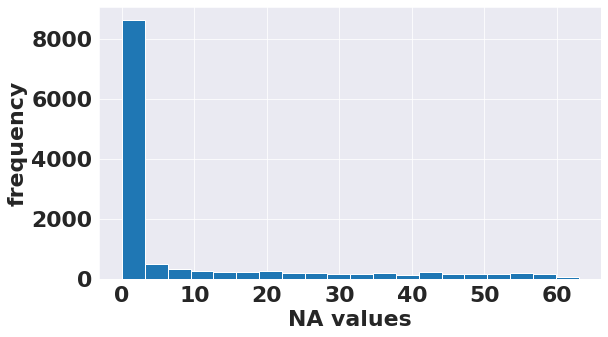

In [181]:
na_val.sort_values(ascending=False).plot(kind='hist',bins=20)
plt.ylabel('frequency',fontsize=22,weight='bold')
plt.xlabel('NA values',fontsize=22,weight='bold')
plt.show()

## Observation
### we can clearly see that there are several features (proteins) with missing values in more than 10 samples,  which corresponds to > 10 % of 83 samples. such features with excessive missing values will cause errors and have to be removed

In [263]:
# get list of features with NA values greater than 2
na_val_index=na_val[na_val>8].index.tolist() 

In [264]:
# filter columns in dataset to remove feaures with NA values greater than 2 
comp_cases=[n for n in reshaped_proteome.columns if n not in na_val_index]    

In [265]:
# number of features (proteins) with less than 2 NA values
len(comp_cases)

9334

In [266]:
fl_proteome=reshaped_proteome[comp_cases]
fl_proteome.shape

(83, 9334)

In [267]:
fl_proteome=fl_proteome.fillna(fl_proteome.mean()) # NA values filled with mean

In [268]:
fl_proteome.isna().sum().sort_values(ascending=False)

NP_068835       0
NP_036244       0
NP_000512       0
NP_003070       0
NP_619579       0
               ..
NP_000104       0
NP_001243439    0
NP_079202       0
NP_002872       0
NP_958782       0
Length: 9334, dtype: int64

#### no NA values, all features are filled with values

##### The last 3 samples are healthy tissue.We have created a column 'Type', and labelled cancer tissue 
##### as Cancer and healthy tissue as Healthy

In [269]:
fl_proteome['Type']="Cancer"
fl_proteome.iloc[-3:,-1]="Healthy"

#### Cancer samples type

In [270]:
fl_proteome.iloc[:3,-1]

AO-A12D.01TCGA    Cancer
C8-A131.01TCGA    Cancer
AO-A12B.01TCGA    Cancer
Name: Type, dtype: object

#### Healthy samples

In [271]:
fl_proteome.iloc[-3:,-1]

263d3f-I.CPTAC    Healthy
blcdb9-I.CPTAC    Healthy
c4155b-C.CPTAC    Healthy
Name: Type, dtype: object

In [272]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "anubratadas/breast-cancer-proteomes-4" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/anubratadas/breast-cancer-proteomes-4


'https://jovian.ai/anubratadas/breast-cancer-proteomes-4'

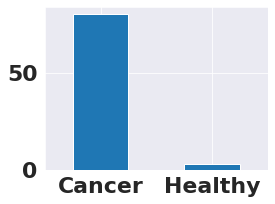

In [273]:
fl_proteome.Type.value_counts().plot(kind='bar',figsize=(4,3),rot=0)
plt.show()

### There is an imbalance in the 2 classes in this dataset

### The distribution of fold change in proteins in the cancer samples

In [274]:
# we are choosing only cancer samples
cancer_proteome=fl_proteome.iloc[:-3,:-1]
cancer_proteome.shape

(80, 9334)

In [275]:
cancer_mean_list=cancer_proteome.mean().values.tolist()

In [276]:
cmean=cancer_proteome.mean()
cstd=cancer_proteome.std()

In [277]:
cmean.name='mean_cancer'
cstd.name='std_cancer'

In [278]:
# mean and median of the cancer samples
print(f'mean cancer dataset {cmean.mean()}, medain cancer dataset {cmean.median()}')

mean cancer dataset -0.15374947663780825, medain cancer dataset -0.04141685377500001


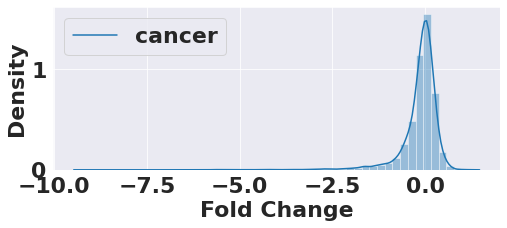

In [279]:
fig=plt.figure(figsize=(8,3))
sns.distplot(cancer_mean_list,hist=True,axlabel="Fold Change")
plt.legend(['cancer'])
plt.xlabel('Fold Change',fontsize=22,weight='bold')
plt.ylabel('Density',fontsize=22,weight='bold')
plt.show()

### Observation
### The distribution appears normal with negative skew with mean less than median

### The distribution of fold change in proteins in the healthy samples

In [280]:
# we are choosing healthy samples in the dataset
Healthy_proteome=fl_proteome.iloc[-3:,:-1]
Healthy_proteome.shape

(3, 9334)

In [281]:
healthy_mean_list=Healthy_proteome.mean().values.tolist()

In [282]:
hmean=Healthy_proteome.mean()
hstd=Healthy_proteome.std()

In [283]:
hmean.name='mean_healthy'
hstd.name='std_healthy'

In [284]:
# mean and median of the healthy samples
print(f'mean healthy dataset {hmean.mean()}, median healthy dataset {hmean.median()}')

mean healthy dataset 0.10014919606134338, median healthy dataset 0.03046302883333334


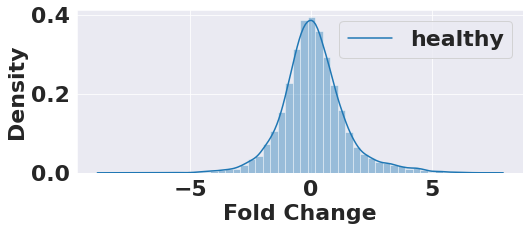

In [285]:
fig=plt.figure(figsize=(8,3))
sns.distplot(healthy_mean_list,hist=True,axlabel="Fold Change")
plt.legend(['healthy'])
plt.xlabel('Fold Change',fontsize=22,weight='bold')
plt.ylabel('Density',fontsize=22,weight='bold')
plt.show()

### Observation
### The distribution appears as Normal distribution with mean greater than median

### superimposing both the cancer and healthy sample expression levels

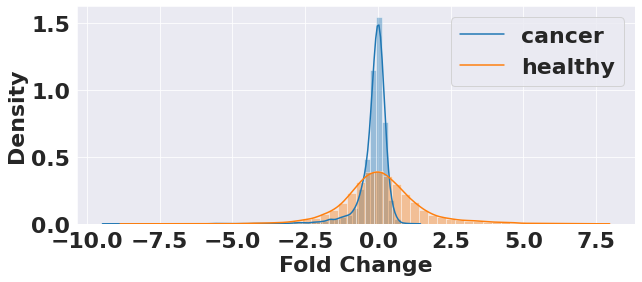

In [286]:
fig=plt.figure(figsize=(10,4))
g=sns.distplot(cancer_mean_list,hist=True,axlabel="Fold Change")
h=sns.distplot(healthy_mean_list,hist=True,axlabel="Fold Change")
plt.legend(['cancer','healthy'])
plt.xlabel('Fold Change',fontsize=22,weight='bold')
plt.ylabel('Density',fontsize=22,weight='bold')
plt.show()

### Observation
### There is a shift in the abundance of proteins in cancer samples and a remarkable uniformity in their abundance, as compared to normal samples. It would be worthwhile to see proteins overexpressed in cancer as compared to healthy samples. iTRAQ measures protein abundance. The levels of protein can fall by proteolytic  processing and/or lower expression. The levels will rise due to increased expression

In [287]:
proteome_foldchange_df=pd.concat([gene_name_df,cmean,cstd,hmean,hstd],axis=1,join='inner')

In [289]:
proteome_foldchange_df['log_coeffvar_cncr']=np.log10(np.abs(proteome_foldchange_df.std_cancer/proteome_foldchange_df.mean_cancer))
proteome_foldchange_df['log_coeffvar_hlth']=np.log10(np.abs(proteome_foldchange_df.std_healthy/proteome_foldchange_df.mean_healthy))

In [290]:
proteome_foldchange_df

gene_symbol                                          gene_name  \
NP_958782        PLEC                                  plectin isoform 1   
NP_958785         NaN                                 plectin isoform 1g   
NP_958786        PLEC                                 plectin isoform 1a   
NP_000436         NaN                                 plectin isoform 1c   
NP_958781         NaN                                 plectin isoform 1e   
...               ...                                                ...   
NP_078879       BEND5                    BEN domain-containing protein 5   
NP_653179   MAPK1IP1L  MAPK-interacting and spindle-stabilizing prote...   
NP_699178     TMEM86A            lysoplasmalogenase-like protein TMEM86A   
NP_006140      LGALS4                                         galectin-4   
NP_068835        UTS2                urotensin-2 isoform a preproprotein   

           mean_cancer  std_cancer  mean_healthy  std_healthy  \
NP_958782     0.320062    0.992604      0.324758     0.447186   
NP_958785     0.326656    0.995952      0.333827     0.448599   
NP_958786     0.326232    0.995815      0.331573     0.448458   
NP_000436     0.323387    0.994313      0.331573     0.448458   
NP_958781     0.326678    0.996615      0.337887     0.437526   
...                ...         ...           ...          ...   
NP_078879     0.885437    3.638328      5.507378     3.157078   
NP_653179    -0.119336    0.980365     -0.119336     0.000000   
NP_699178     0.128945    1.703473     -0.407810     0.440161   
NP_006140     0.629517    2.446497      1.492421     2.637144   
NP_068835     0.171520    1.391458     -1.876604     0.869564   

           log_coeffvar_cncr  log_coeffvar_hlth  
NP_958782           0.491541           0.138927  
NP_958785           0.484148           0.128336  
NP_958786           0.484652           0.131143  
NP_000436           0.487800           0.131143  
NP_958781           0.484407           0.112232  
...                      ...                ...  
NP_078879           0.613744          -0.241660  
NP_653179           0.914618               -inf  
NP_699178           1.120932           0.033154  
NP_006140           0.589537           0.247243  
NP_068835           0.909156          -0.334071  

[9334 rows x 8 columns]

### The changes in cancer would be due to overexpression of genes or repression of genes, and this will be reflected in the levels of the protein. Since absolute levels are not given, we  cannot compare the levels of protein in cancer and healthy samples directly. To compare cancer and healthy samples,we shall use the concept of Housekeeping genes. The expression of these genes is fairly constant and the proteins are present at constant levels. Prominently GAPDH, beta actin, beta tubulin are also used as loadng controls in western blots. A paper also cites that ribosome protein levels are fairly constant (Geiger T, Wehner A, Schaab C, Cox J, Mann M.  Mol Cell Proteomics. 2012 Mar;11(3))

## Housekeeping Genes

In [291]:
housekeeping=['NP_000968','NP_000966','NP_001013','NP_001017963','NP_057004','NP_821133','NP_001092','NP_002037','NP_000960']

### List of housekeeping proteins

In [292]:
proteome_foldchange_df.loc[housekeeping,:]

gene_symbol                                          gene_name  \
NP_000968            NaN                60S ribosomal protein L13 isoform 1   
NP_000966          RPL11                60S ribosomal protein L11 isoform 1   
NP_001013            NaN                          40S ribosomal protein S19   
NP_001017963         NaN          heat shock protein HSP 90-alpha isoform 1   
NP_057004         RPS27L                     40S ribosomal protein S27-like   
NP_821133           TUBB                                 tubulin beta chain   
NP_001092           ACTB                               actin, cytoplasmic 1   
NP_002037        GAPDHL6  glyceraldehyde-3-phosphate dehydrogenase isofo...   
NP_000960            NaN                           60S ribosomal protein L5   

              mean_cancer  std_cancer  mean_healthy  std_healthy  \
NP_000968       -0.245194    1.517420     -0.569403     1.148383   
NP_000966        0.158824    0.469693     -0.120288     0.383864   
NP_001013        0.155284    1.037320     -0.100351     0.329323   
NP_001017963     0.054743    0.702963     -0.793373     0.091350   
NP_057004        0.181793    0.841232     -0.136627     0.427549   
NP_821133        0.257342    0.512544     -0.463977     0.347398   
NP_001092        0.323812    0.741426      0.688672     0.308608   
NP_002037       -0.129247    0.848575      0.874110     0.291477   
NP_000960        0.031497    0.870826     -0.774514     0.177887   

              log_coeffvar_cncr  log_coeffvar_hlth  
NP_000968              0.791595           0.304667  
NP_000966              0.470897           0.503955  
NP_001013              0.824785           0.516100  
NP_001017963           1.108606          -0.938771  
NP_057004              0.665338           0.495448  
NP_821133              0.299221          -0.125669  
NP_001092              0.359774          -0.348605  
NP_002037              0.817269          -0.476961  
NP_000960              1.441665          -0.638885

In [293]:
house_names=['RPL13','RPL11','RPS19','HSP90','RPS27','TUBB','ACTB','GAPDH','RPL5']

In [294]:
housekeeping_cancer=cancer_proteome[housekeeping]

In [295]:
housekeeping_healthy=Healthy_proteome[housekeeping]

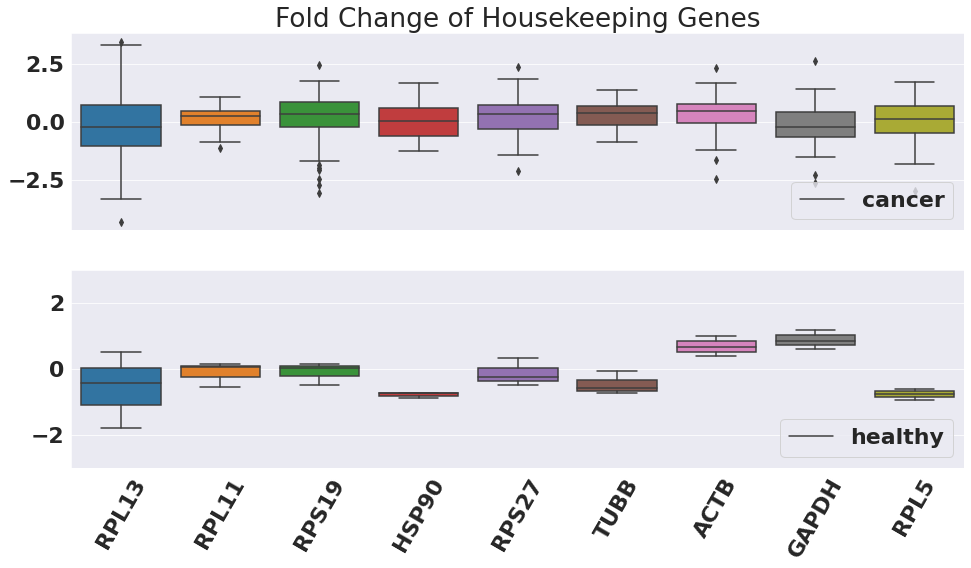

In [296]:
fig,axs=plt.subplots(2,sharex=True,figsize=(16,8))
ghk=sns.boxplot(data=housekeeping_cancer,ax=axs[0])
ghk.set_title('Fold Change of Housekeeping Genes')
ghk.legend(["cancer"],loc='lower right')
hhk=sns.boxplot(data=housekeeping_healthy,ax=axs[1])
hhk.legend(["healthy"],loc='lower right')
hhk.set_xticklabels(house_names,rotation=90)
hhk.set(ylim=(-3,3))
plt.xticks(rotation=60)
plt.show()

## Observation
### Ribosomal protein L11 (RPL11) and beta tubulin (TUBB) can be suitably used to study cancer related protein changes. We shall use beta tubulin, as we can co-relate our study with previous experimental studies 

### proteins with fold change greater than beta-tubulin 

In [297]:
proteome_foldchange_df['corrected_cancer']=proteome_foldchange_df.mean_cancer-0.257342
proteome_foldchange_df['corrected_health']=proteome_foldchange_df.mean_healthy-(-0.463977)

In [298]:
proteome_foldchange_df['foldchange_cancer']=proteome_foldchange_df['corrected_cancer']-proteome_foldchange_df['corrected_health']

In [299]:
proteome_foldchange_df['composite_coeff']=proteome_foldchange_df['log_coeffvar_cncr']+proteome_foldchange_df['log_coeffvar_hlth']

In [300]:
proteome_foldchange_df

gene_symbol                                          gene_name  \
NP_958782        PLEC                                  plectin isoform 1   
NP_958785         NaN                                 plectin isoform 1g   
NP_958786        PLEC                                 plectin isoform 1a   
NP_000436         NaN                                 plectin isoform 1c   
NP_958781         NaN                                 plectin isoform 1e   
...               ...                                                ...   
NP_078879       BEND5                    BEN domain-containing protein 5   
NP_653179   MAPK1IP1L  MAPK-interacting and spindle-stabilizing prote...   
NP_699178     TMEM86A            lysoplasmalogenase-like protein TMEM86A   
NP_006140      LGALS4                                         galectin-4   
NP_068835        UTS2                urotensin-2 isoform a preproprotein   

           mean_cancer  std_cancer  mean_healthy  std_healthy  \
NP_958782     0.320062    0.992604      0.324758     0.447186   
NP_958785     0.326656    0.995952      0.333827     0.448599   
NP_958786     0.326232    0.995815      0.331573     0.448458   
NP_000436     0.323387    0.994313      0.331573     0.448458   
NP_958781     0.326678    0.996615      0.337887     0.437526   
...                ...         ...           ...          ...   
NP_078879     0.885437    3.638328      5.507378     3.157078   
NP_653179    -0.119336    0.980365     -0.119336     0.000000   
NP_699178     0.128945    1.703473     -0.407810     0.440161   
NP_006140     0.629517    2.446497      1.492421     2.637144   
NP_068835     0.171520    1.391458     -1.876604     0.869564   

           log_coeffvar_cncr  log_coeffvar_hlth  corrected_cancer  \
NP_958782           0.491541           0.138927          0.062720   
NP_958785           0.484148           0.128336          0.069314   
NP_958786           0.484652           0.131143          0.068890   
NP_000436           0.487800           0.131143          0.066045   
NP_958781           0.484407           0.112232          0.069336   
...                      ...                ...               ...   
NP_078879           0.613744          -0.241660          0.628095   
NP_653179           0.914618               -inf         -0.376678   
NP_699178           1.120932           0.033154         -0.128397   
NP_006140           0.589537           0.247243          0.372175   
NP_068835           0.909156          -0.334071         -0.085822   

           corrected_health  foldchange_cancer  composite_coeff  
NP_958782          0.788735          -0.726015         0.630469  
NP_958785          0.797804          -0.728490         0.612484  
NP_958786          0.795550          -0.726659         0.615794  
NP_000436          0.795550          -0.729504         0.618942  
NP_958781          0.801864          -0.732528         0.596639  
...                     ...                ...              ...  
NP_078879          5.971355          -5.343260         0.372084  
NP_653179          0.344641          -0.721319             -inf  
NP_699178          0.056167          -0.184564         1.154085  
NP_006140          1.956398          -1.584222         0.836780  
NP_068835         -1.412627           1.326805         0.575085  

[9334 rows x 12 columns]

In [302]:
cancer_altered_df=proteome_foldchange_df.loc[:,['gene_name','corrected_cancer','corrected_health','foldchange_cancer','composite_coeff']]

In [305]:
from plotly import __version__

In [306]:
import cufflinks as cf

In [311]:
import plotly.graph_objects as go

In [321]:
fig = go.Figure(data=go.Scatter(x=cancer_altered_df['foldchange_cancer'],
                                y=cancer_altered_df['composite_coeff'],
                                mode='markers',
                                marker_color=cancer_altered_df['corrected_cancer'],
                                text=cancer_altered_df['gene_name'])) # hover text goes here

fig.update_yaxes(range=[-5, 5])
fig.update_layout(title='Altered proteins in Breast Cancer')
fig.show()

### most proteins in cancer are downregulated

In [325]:
# upregulated proteins in cancer
cancer_altered_df[cancer_altered_df.corrected_cancer>0].sort_values(by='foldchange_cancer',ascending=False).head(n=10)

gene_name  \
NP_000095                                   cytochrome P450 1B1   
NP_068809     DNA-directed RNA polymerases I, II, and III su...   
NP_001875     hyaluronan and proteoglycan link protein 1 pre...   
NP_652760          regulator of G-protein signaling 3 isoform 5   
NP_006160                      nicotinamide N-methyltransferase   
NP_652759          regulator of G-protein signaling 3 isoform 6   
NP_001180276      myocyte-specific enhancer factor 2C isoform 3   
NP_056177                 elongator complex protein 5 isoform 1   
NP_002388         myocyte-specific enhancer factor 2C isoform 1   
NP_000027                             AMP deaminase 1 isoform 1   

              corrected_cancer  corrected_health  foldchange_cancer  \
NP_000095             0.051286         -2.154029           2.205316   
NP_068809             0.024831         -2.132737           2.157569   
NP_001875             0.067005         -1.686429           1.753435   
NP_652760             0.145641         -1.379289           1.524931   
NP_006160             0.043239         -1.429770           1.473009   
NP_652759             0.092496         -1.379289           1.471785   
NP_001180276          0.034647         -1.382683           1.417329   
NP_056177             0.027754         -1.386914           1.414668   
NP_002388             0.028749         -1.382683           1.411432   
NP_000027             0.013540         -1.386242           1.399782   

              composite_coeff  
NP_000095            0.383291  
NP_068809            0.149210  
NP_001875            0.346672  
NP_652760            0.279256  
NP_006160            0.374612  
NP_652759            0.280565  
NP_001180276         0.240227  
NP_056177            0.097073  
NP_002388            0.247873  
NP_000027            0.613055

In [328]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "anubratadas/breast-cancer-proteomes-4" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/anubratadas/breast-cancer-proteomes-4


'https://jovian.ai/anubratadas/breast-cancer-proteomes-4'